In [40]:
#Cyclone Image Classification using VGG16

In [41]:
#The Aim of this Notebook is to develop Cyclone Image Classification Model

In [113]:
import matplotlib.pyplot as plt 
import keras,os
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [114]:
path='/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images'

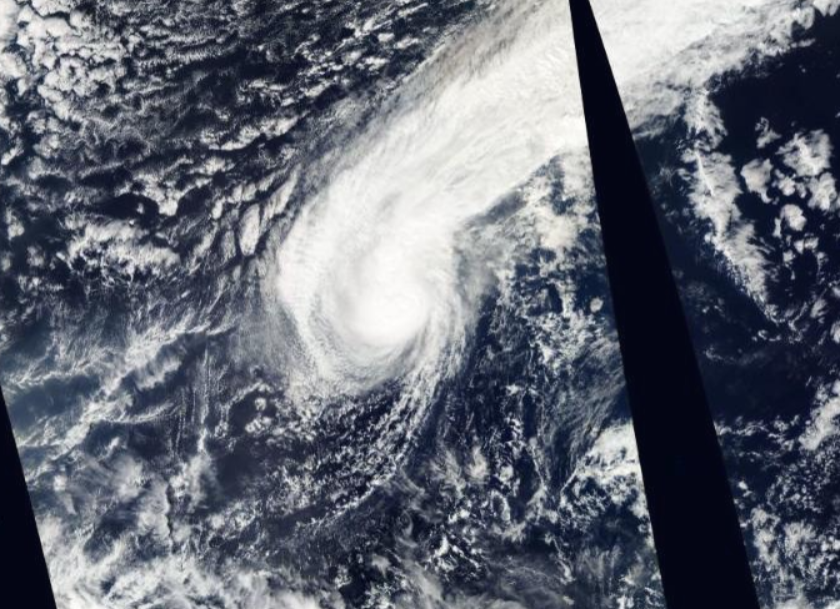

In [115]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test_50/Severe Tropical Storm_SS/jan1-17.30-2005.PNG')

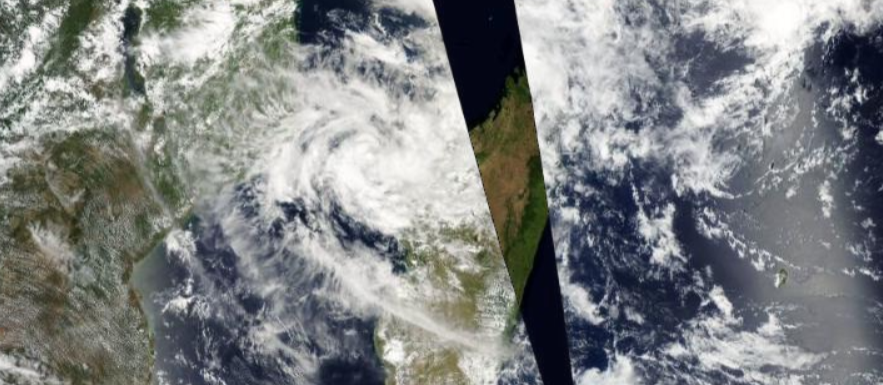

In [116]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test_50/Tropical Storm_S/Dec30-23.30-2003.PNG')

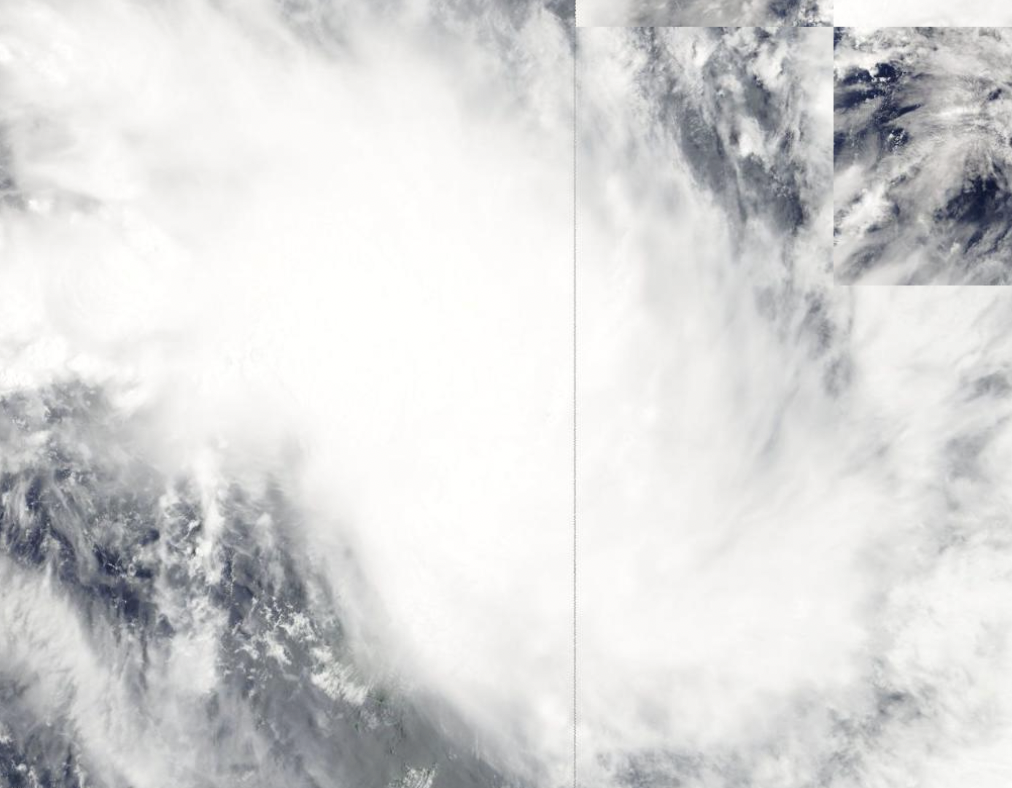

In [117]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Image_classification_Data/Train/Tropical Depression/Screenshot 2022-02-02 at 6.40.57 PM.png')

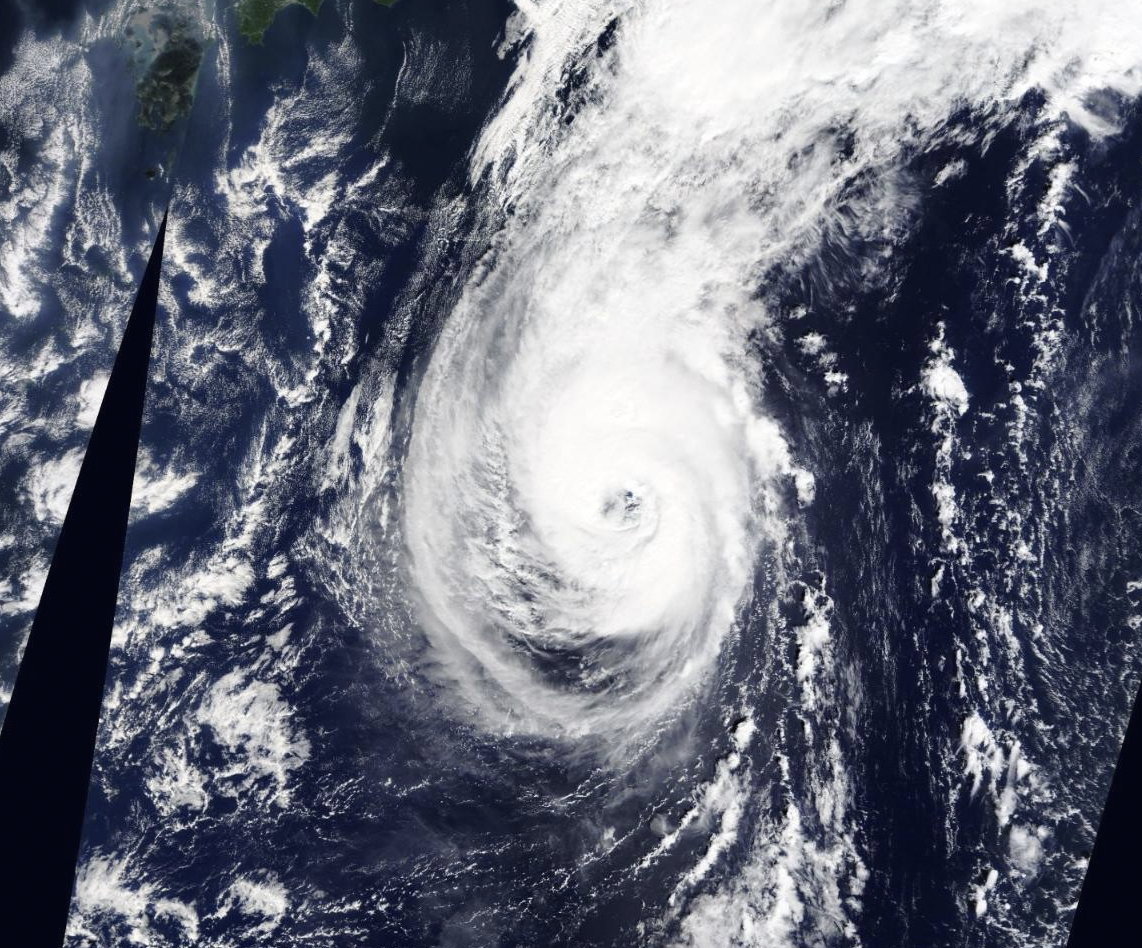

In [118]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Image_classification_Data/Train/Typhoon/Screenshot 2021-12-22 at 6.23.08 PM.png')

In [119]:
Data PreProcessing

SyntaxError: ignored

**Data PreProcessing**

In [120]:
training_datagenerator = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)

In [121]:
train_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train',
                                                         target_size=(224,224),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         shuffle=True)

Found 160 images belonging to 4 classes.


In [122]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3], dtype=int32)

In [123]:
train_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Storm': 2,
 'Typhoon': 3}

In [124]:
test_datagenrator=ImageDataGenerator(rescale = 1./255)

In [125]:
test_dataset=test_datagenrator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test',
                                                        target_size=(224,224),
                                                        batch_size=1,
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 80 images belonging to 4 classes.


In [55]:
#vgg-16

In [143]:
VGG=tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')


In [144]:
VGG.trainable=False

In [145]:
classifier=Sequential([VGG,keras.layers.Flatten(),
                       #keras.layers.Dense(units=256,activation="relu"),
                       keras.layers.Dense(units=128,activation="relu"),
                       keras.layers.Dense(units=4,activation="softmax")
])


In [ ]:
#Create Convolutional Neural Network to Classify the Cyclone Images

**Create Convolutional Neural Network to Classify the Cyclone Images**

In [146]:
#classifier=Sequential()
#classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#classifier.add(MaxPool2D(pool_size= (2,2)))

#classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#classifier.add(MaxPool2D(pool_size= (2,2)))

#classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#classifier.add(MaxPool2D(pool_size= (2,2)))

#classifier.add(Flatten())

#classifier.add(Dense(units=128, activation='relu'))
#classifier.add(Dense(units=4, activation='softmax'))

classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               3211392   
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                                 
Total params: 17,926,596
Trainable params: 3,211,908
Non-trainable params: 14,714,688
_________________________________________________________________


**Compile the Model**

In [147]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

**Training our model**

In [186]:
#hist=classifier.fit_generator(train_dataset,epochs=60,validation_data=train_dataset)
hist=classifier.fit_generator(train_dataset,epochs=11,validation_data=test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/11
5/5 [==============================] - 133s 29s/step - loss: 0.0567 - accuracy: 0.9937 - val_loss: 1.2298 - val_accuracy: 0.6125
Epoch 2/11
5/5 [==============================] - 133s 29s/step - loss: 0.0488 - accuracy: 0.9937 - val_loss: 1.2225 - val_accuracy: 0.6000
Epoch 3/11
5/5 [==============================] - 133s 29s/step - loss: 0.0661 - accuracy: 0.9875 - val_loss: 1.3965 - val_accuracy: 0.5625
Epoch 4/11
5/5 [==============================] - 134s 29s/step - loss: 0.0506 - accuracy: 0.9937 - val_loss: 1.3279 - val_accuracy: 0.6375
Epoch 5/11
5/5 [==============================] - 133s 28s/step - loss: 0.0441 - accuracy: 0.9937 - val_loss: 1.3179 - val_accuracy: 0.5875
Epoch 6/11
5/5 [==============================] - 133s 29s/step - loss: 0.0440 - accuracy: 0.9937 - val_loss: 1.3450 - val_accuracy: 0.6250
Epoch 7/11
5/5 [==============================] - 134s 29s/step - loss: 0.0377 - accuracy: 0.9937 - val_loss: 1.3038 - val_accuracy: 0.6250
Epoch 8/11
5/5 [====

In [187]:
classifier.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               3211392   
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                                 
Total params: 17,926,596
Trainable params: 3,211,908
Non-trainable params: 14,714,688
_________________________________________________________________


In [188]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Storm': 2,
 'Typhoon': 3}

In [189]:
predictions=classifier.predict(test_dataset)
predictions

array([[9.75553751e-01, 9.36782919e-04, 1.45236857e-03, 2.20571235e-02],
       [9.38578248e-01, 1.11545213e-02, 1.24875819e-02, 3.77796218e-02],
       [9.95339394e-01, 9.54964024e-04, 7.75943499e-06, 3.69801256e-03],
       [9.26136672e-01, 1.02245472e-02, 3.42800980e-03, 6.02107160e-02],
       [6.22629583e-01, 3.42990905e-01, 1.04069551e-02, 2.39725299e-02],
       [9.86814022e-01, 4.24214778e-03, 2.96745193e-03, 5.97642828e-03],
       [9.60769475e-01, 2.45929994e-02, 4.98804124e-03, 9.64948349e-03],
       [2.07716636e-02, 5.30379403e-08, 5.43794476e-06, 9.79222775e-01],
       [2.92033274e-02, 4.04643032e-07, 1.25427498e-04, 9.70670819e-01],
       [9.78976965e-01, 1.11057716e-06, 1.00410841e-02, 1.09807691e-02],
       [9.85231519e-01, 2.06103823e-06, 4.26312588e-04, 1.43399760e-02],
       [9.71960962e-01, 7.55274028e-04, 2.43027247e-02, 2.98118172e-03],
       [2.17633881e-02, 8.17270944e-08, 2.06436271e-05, 9.78215873e-01],
       [8.94109681e-02, 2.01068746e-04, 2.25597614e

In [190]:
predictions=np.argmax(predictions,axis=1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0])

In [191]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Storm': 2,
 'Typhoon': 3}

In [179]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Storm': 2,
 'Typhoon': 3}

In [192]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.6

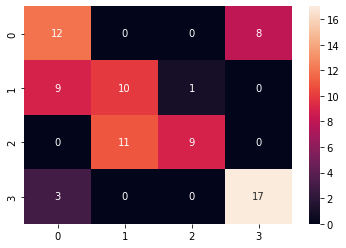

In [194]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True)

In [195]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        20
           1       0.48      0.50      0.49        20
           2       0.90      0.45      0.60        20
           3       0.68      0.85      0.76        20

    accuracy                           0.60        80
   macro avg       0.64      0.60      0.60        80
weighted avg       0.64      0.60      0.60        80



Text(0, 0.5, 'Train and test loss ')

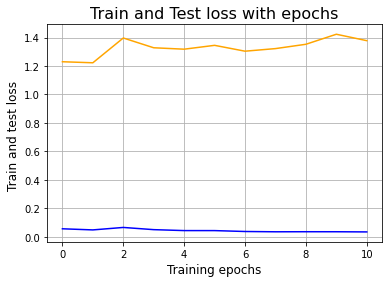

In [196]:
#ploting trsults with accuracy
plt.plot(hist.history['loss'],color='blue',label='train')
plt.plot(hist.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test loss ',fontsize=12)

Text(0, 0.5, 'Train and test accuracy')

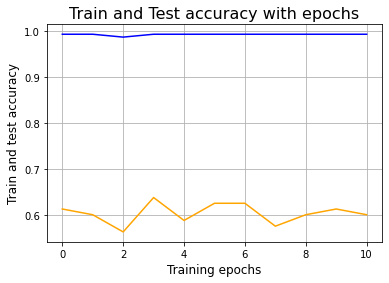

In [197]:
#ploting trsults with accuracy
plt.plot(hist.history['accuracy'],color='blue',label='train')
plt.plot(hist.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test accuracy with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test accuracy',fontsize=12)

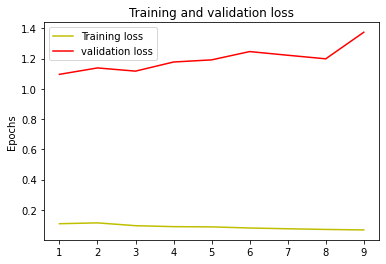

In [184]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training and validation loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [98]:
#Prediction Using Trained Model

In [185]:
image=cv2.imread('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/sam_test/moderate_TS_S.png')

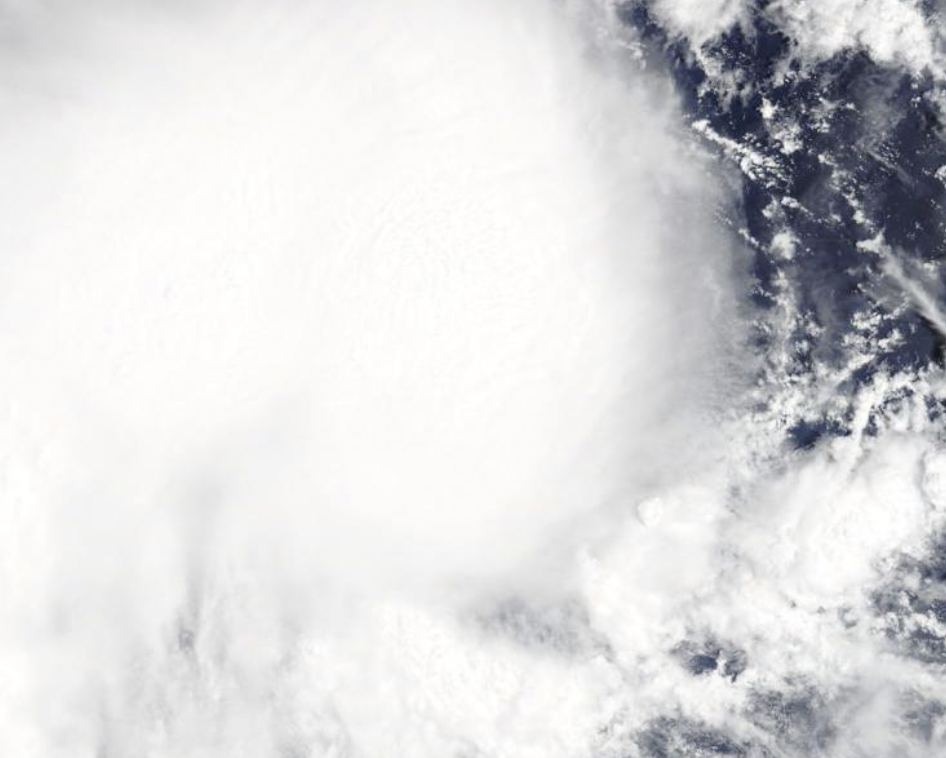

In [100]:
cv2_imshow(image)

In [101]:
image.shape

(758, 946, 3)

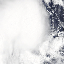

In [102]:
#reshape image
image=cv2.resize(image,(64,64))
cv2_imshow(image)

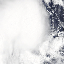

In [103]:
image=cv2.resize(image,(64,64))
cv2_imshow(image)

In [104]:
image

array([[[206, 205, 205],
        [211, 210, 211],
        [211, 210, 210],
        ...,
        [220, 221, 219],
        [119, 107, 103],
        [131, 120, 118]],

       [[203, 201, 200],
        [209, 207, 207],
        [211, 209, 209],
        ...,
        [246, 247, 248],
        [200, 195, 192],
        [169, 162, 159]],

       [[203, 201, 201],
        [206, 205, 205],
        [212, 210, 211],
        ...,
        [241, 240, 241],
        [229, 229, 229],
        [174, 171, 169]],

       ...,

       [[250, 251, 253],
        [249, 250, 251],
        [244, 246, 246],
        ...,
        [170, 166, 165],
        [139, 133, 128],
        [216, 214, 212]],

       [[249, 250, 251],
        [252, 253, 254],
        [246, 248, 249],
        ...,
        [205, 203, 202],
        [181, 171, 171],
        [188, 185, 184]],

       [[249, 250, 251],
        [252, 254, 254],
        [248, 250, 250],
        ...,
        [202, 199, 198],
        [201, 199, 198],
        [205, 201, 200]]

In [105]:
image=image/255

In [106]:
image

array([[[0.80784314, 0.80392157, 0.80392157],
        [0.82745098, 0.82352941, 0.82745098],
        [0.82745098, 0.82352941, 0.82352941],
        ...,
        [0.8627451 , 0.86666667, 0.85882353],
        [0.46666667, 0.41960784, 0.40392157],
        [0.51372549, 0.47058824, 0.4627451 ]],

       [[0.79607843, 0.78823529, 0.78431373],
        [0.81960784, 0.81176471, 0.81176471],
        [0.82745098, 0.81960784, 0.81960784],
        ...,
        [0.96470588, 0.96862745, 0.97254902],
        [0.78431373, 0.76470588, 0.75294118],
        [0.6627451 , 0.63529412, 0.62352941]],

       [[0.79607843, 0.78823529, 0.78823529],
        [0.80784314, 0.80392157, 0.80392157],
        [0.83137255, 0.82352941, 0.82745098],
        ...,
        [0.94509804, 0.94117647, 0.94509804],
        [0.89803922, 0.89803922, 0.89803922],
        [0.68235294, 0.67058824, 0.6627451 ]],

       ...,

       [[0.98039216, 0.98431373, 0.99215686],
        [0.97647059, 0.98039216, 0.98431373],
        [0.95686275, 0

In [107]:
image.shape

(64, 64, 3)

In [108]:
image=image.reshape(-1,64,64,3)
image.shape

(1, 64, 64, 3)

In [110]:
result =classifier.predict(image)
result

array([[1.2094795e-01, 5.5638575e-03, 8.7348813e-01, 5.8671257e-10]],
      dtype=float32)

In [111]:
result=np.argmax(result)
result

2

In [112]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Storm': 2,
 'Typhoon': 3}

In [ ]:
#The model correctly classified the input image as Tropical Strom.

In [ ]:
#Save and Load Model

In [ ]:
model_json=classifier.to_json()
with open('classifier.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
classifier_saved=save_model(classifier,'/content/weights.hdf5')

In [ ]:
with open('classifier.json','r') as json_file:
  json_saved_model=json_file.read()
json_saved_model